In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv("Car_sales.csv")

In [4]:
#Read top five values

df.head()

,Manufacturer,Model,Sales in thousands,4-year resale value,Vehicle type,Price in thousands,Engine size,Horsepower,Wheelbase,Width,Length,Curb weight,Fuel capacity,Fuel efficiency,Latest Launch
0,Acura,Integra,16.919,16.36,Passenger,21.5,1.8,140,101.2,67.3,172.4,2.639,13.2,28,2-Feb-14
1,Acura,TL,39.384,19.875,Passenger,28.4,3.2,225,108.1,70.3,192.9,3.517,17.2,25,6-Mar-15
2,Acura,CL,14.114,18.225,Passenger,.,3.2,225,106.9,70.6,192,3.47,17.2,26,1-Apr-14
3,Acura,RL,8.588,29.725,Passenger,42,3.5,210,114.6,71.4,196.6,3.85,18,22,3-Oct-15
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150,102.6,68.2,178,2.998,16.4,27,10-Aug-15


In [5]:
# Print dataframe info_data types of each column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales in thousands   157 non-null    float64
 3   4-year resale value  157 non-null    object 
 4   Vehicle type         157 non-null    object 
 5   Price in thousands   157 non-null    object 
 6   Engine size          157 non-null    object 
 7   Horsepower           157 non-null    object 
 8   Wheelbase            157 non-null    object 
 9   Width                157 non-null    object 
 10  Length               157 non-null    object 
 11  Curb weight          157 non-null    object 
 12  Fuel capacity        157 non-null    object 
 13  Fuel efficiency      157 non-null    object 
 14  Latest Launch        157 non-null    object 
dtypes: float64(1), object(14)
memory usage: 

In [6]:
# Print number of rows and columns

rows, cols = df.shape
print(f"Number of rows and columns: {rows} x {cols}")
print("Number of rows and columns:",df.shape[0],df.shape[1])

Number of rows and columns: 157 x 15
Number of rows and columns: 157 15


In [7]:
# Drop duplicate rows_if any

df_cleaned = df.drop_duplicates()
df_cleaned

,Manufacturer,Model,Sales in thousands,4-year resale value,Vehicle type,Price in thousands,Engine size,Horsepower,Wheelbase,Width,Length,Curb weight,Fuel capacity,Fuel efficiency,Latest Launch
0,Acura,Integra,16.919,16.36,Passenger,21.5,1.8,140,101.2,67.3,172.4,2.639,13.2,28,2-Feb-14
1,Acura,TL,39.384,19.875,Passenger,28.4,3.2,225,108.1,70.3,192.9,3.517,17.2,25,6-Mar-15
2,Acura,CL,14.114,18.225,Passenger,.,3.2,225,106.9,70.6,192,3.47,17.2,26,1-Apr-14
3,Acura,RL,8.588,29.725,Passenger,42,3.5,210,114.6,71.4,196.6,3.85,18,22,3-Oct-15
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150,102.6,68.2,178,2.998,16.4,27,10-Aug-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,.,Passenger,24.4,1.9,160,100.5,67.6,176.6,3.042,15.8,25,21-Sep-15
153,Volvo,S70,15.245,.,Passenger,27.5,2.4,168,104.9,69.3,185.9,3.208,17.9,25,24-Nov-14
154,Volvo,V70,17.531,.,Passenger,28.8,2.4,168,104.9,69.3,186.2,3.259,17.9,25,25-Jun-15
155,Volvo,C70,3.493,.,Passenger,45.5,2.3,236,104.9,71.5,185.7,3.601,18.5,23,26-Apr-15


In [8]:
# Print number of rows and columns after dropping duplicates

row_drop, col_drop = df_cleaned.shape
print(f"Number of rows after dropping duplicates: {row_drop}")

Number of rows after dropping duplicates: 157


In [9]:
# 6. Print summary statistics for numerical variables

df.describe()

,Sales in thousands
count,157.000000
mean,52.998076
std,68.029422
min,0.110000
25%,14.114000
50%,29.450000
75%,67.956000
max,540.561000


In [10]:
# Print number of missing values in each column

df.isnull().sum()

Manufacturer           0
Model                  0
Sales in thousands     0
4-year resale value    0
Vehicle type           0
Price in thousands     0
Engine size            0
Horsepower             0
Wheelbase              0
Width                  0
Length                 0
Curb weight            0
Fuel capacity          0
Fuel efficiency        0
Latest Launch          0
dtype: int64

In [11]:
# Drop the column with most missing values

column_drop = df.isnull().sum().idxmax()
#.idxmax() Returns the label (i.e., column name) of the column with the maximum number of missing values.

#  Note : if there is no most missing values all same the first column in the order is droped

#print("Before drop df info \n")
#df.info()
print(column_drop) 

#df = df.drop(df.isnull().sum().idxmax(), axis=1)
df_dropcol = df.drop(columns=[column_drop])
print("\nAfter drop df info \n")
df.info()


Manufacturer

After drop df info 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales in thousands   157 non-null    float64
 3   4-year resale value  157 non-null    object 
 4   Vehicle type         157 non-null    object 
 5   Price in thousands   157 non-null    object 
 6   Engine size          157 non-null    object 
 7   Horsepower           157 non-null    object 
 8   Wheelbase            157 non-null    object 
 9   Width                157 non-null    object 
 10  Length               157 non-null    object 
 11  Curb weight          157 non-null    object 
 12  Fuel capacity        157 non-null    object 
 13  Fuel efficiency      157 non-null    object 
 14  Latest Launch        157 non-null    object 
dtypes: fl

In [12]:
# Drop the rows with categorical missing values
df = df.dropna(subset=df.select_dtypes(include='object').columns)

In [13]:
# 10. Import the rows with numerical missing values
# Identify numerical columns (dtype == int64 or float64)
numerical_cols = df.select_dtypes(include=['number']).columns

# Select rows where any numerical column has missing values
df_missing_numerical = df[df[numerical_cols].isnull().any(axis=1)]
#Without .any(axis=1), you'd just get a full True/False matrix.
#With it, you're summarizing each row into a single decision:
# Display the filtered DataFrame
print("\nRows with Missing Numerical Values:")
print(df_missing_numerical)


Rows with Missing Numerical Values:
Empty DataFrame
Columns: [Manufacturer, Model, Sales in thousands, 4-year resale value, Vehicle type, Price in thousands, Engine size, Horsepower, Wheelbase, Width, Length, Curb weight, Fuel capacity, Fuel efficiency, Latest Launch]
Index: []


In [14]:
# 11. Sort the data w.r.t price_find the details of the most and the least expensive cars


# Drop rows where 'Price' is missing
df = df.dropna(subset=['Price in thousands'])

# convert price from object type to numeric
df['Price in thousands'] = pd.to_numeric(df['Price in thousands'],errors='coerce')

df_sort_price = df.sort_values(by='Price in thousands')[#c0b7db 1.0GiB/4.0GiB(24%) CN:1 DL:30MiB ETA:1m41s]  
least_expensive_car = df_sort_price.iloc[0]
most_expensive_car = df_sort_price.iloc[-1]

print("Least expensive care details : \n\n", least_expensive_car)
print("\n\nMost expensive car details : \n\n",most_expensive_car)




SyntaxError: '[' was never closed (1489591556.py, line 10)

In [15]:
# 12. Write a function to find min and max values of any column

def find_min_max_val_col(df,column):[#c0b7db 1.0GiB/4.0GiB(24%) CN:1 DL:30MiB ETA:1m41s]  
    return df[column].min(), df[column].max()

# Example usage:

min_sales, max_sales = find_min_max_val_col(df,"Sales in thousands")
print(f"Min, max values of sales in thousands col : {min_sales,max_sales} ")

SyntaxError: '[' was never closed (1563653610.py, line 3)

In [16]:
# Call the above function to find min max of horse power, length, fuel efficiency

# Convert multiple columns to numeric using apply
df[['Horsepower', 'Length', 'Fuel efficiency']] = df[['Horsepower', 'Length', 'Fuel efficiency']].apply(pd.to_numeric)

min_hp, max_hp = find_min_max_val_col(df,"Horsepower")
min_len, max_len = find_min_max_val_col(df,"Length")
min_fuel, max_fuel = find_min_max_val_col(df,"Fuel efficiency")

print(f"Min, max values of horsepower col : {min_hp,max_hp} ")
print(f"Min, max values of len col : {min_len,max_len} ")
print(f"Min, max values of fuel efficiency col : {min_fuel,max_fuel} ")

ValueError: Unable to parse string "." at position 33

In [ ]:
# 14. Plot histogram of continuous numerical variable : price,sales,hoursepower,fuelefficiency



# Select only numerical columns
num_cols = df.select_dtypes(include=['number']).columns
df_num_cols = df[num_cols].dropna()

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 8))


axes = axes.flatten()  # Flatten to 1D array for easy indexing

# Loop through numerical columns and plot histograms
for i, col in enumerate(num_cols):

    sns.histplot(df_num_cols[col], kde=True, ax=axes[i])

    axes[i].set_title(f"Histogram of {col.capitalize()}")
    axes[i].set_xlabel(col.capitalize())
    axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()



In [ ]:
# Probability density distribution of continuous numerical variable-length


df_len = df['Length'].dropna()
plt.figure(figsize=(8, 5))
sns.kdeplot(df_len, fill=True, color="blue",alpha=0.5,
label="KDE")

 # Customize plot
plt.title("Probability Density Distribution of Length")
plt.xlabel("Length")
plt.ylabel("Density")
plt.grid()
plt.legend()

# Show plot
plt.show()

In [ ]:
# Count by category –group by manufacture

#df.groupby("Manufacturer").size().reset_index(name="count"
df.groupby("Manufacturer").size()

# actully size() returns a series, so reset_index converts to dataframe

In [ ]:
# 17. Select all numerical variables


num_cols = df.select_dtypes(include=['number']).columns
df_num = df[num_cols]  # Extract numerical columns into a new DataFrame
print(df_num.head())  # Display the first few rows


In [ ]:
# Print correlation coefficient value of price and sales

df_corr = df[["Price in thousands" , "Sales in thousands"]].dropna()

correlation  = df_corr["Price in thousands"].corr(df["Sales in thousands"])

print("Correlation coeff of price and sales : ", correlation)



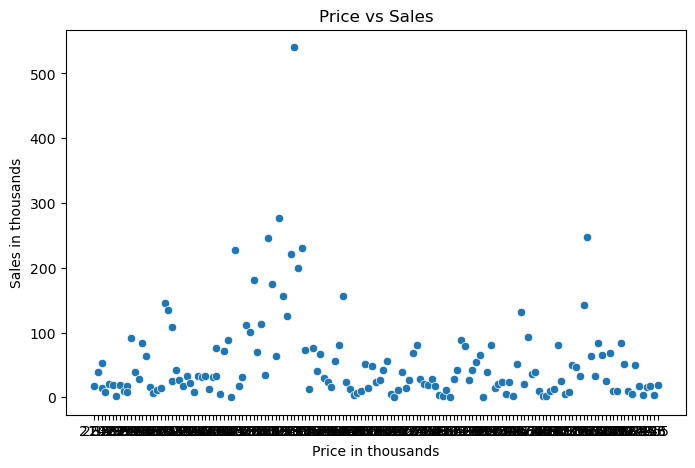

In [17]:
# Plot correlation of price and sales using scatterplot

df.columns = df.columns.str.lower()

price_col = next((col for col in df.columns if "price" in col),None)
sales_col = next((col for col in df.columns if "sales" in col),None)

if price_col and sales_col : 
    plt.figure(figsize=(8,5))
    df_plot = df[[price_col,sales_col]].dropna()
    sns.scatterplot(x=df_plot[price_col], y=df_plot[sales_col])
    plt.title('Price vs Sales')
    plt.xlabel(price_col.capitalize())
    plt.ylabel(sales_col.capitalize())
    plt.show()
else :
    print("No columns with 'price' or 'sales' found in the dataframe")



/home/rgukt-basar/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


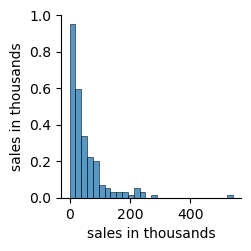

In [18]:
# Pair plot 




num_cols = df.select_dtypes(include='number').columns

# Drop missing values in numerical columns
df_pair = df[num_cols].dropna()



# Create pair plot
sns.pairplot(df_pair)

# Show the plot
plt.show()


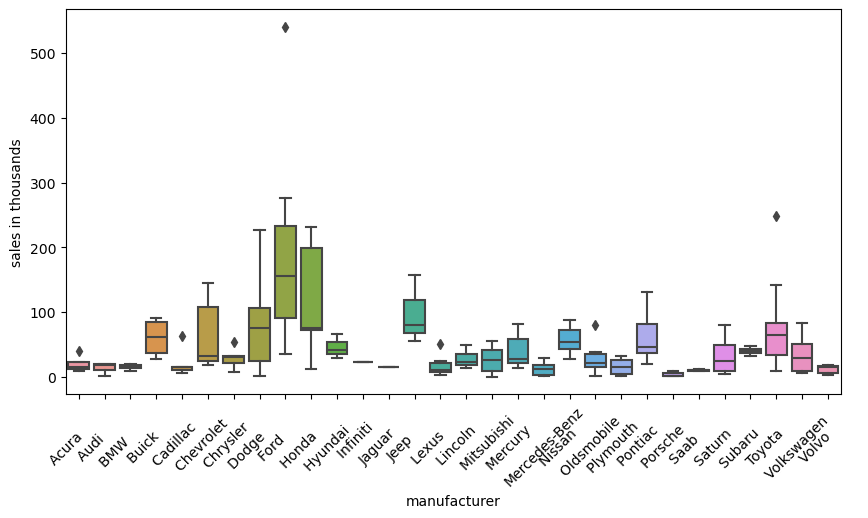

In [19]:
# 21. Boxplot of sales of different manufacturer


plt.figure(figsize=(10,5))
sns.boxplot(x='manufacturer', y='sales in thousands', data=df)
plt.xticks(rotation=45)
plt.show()

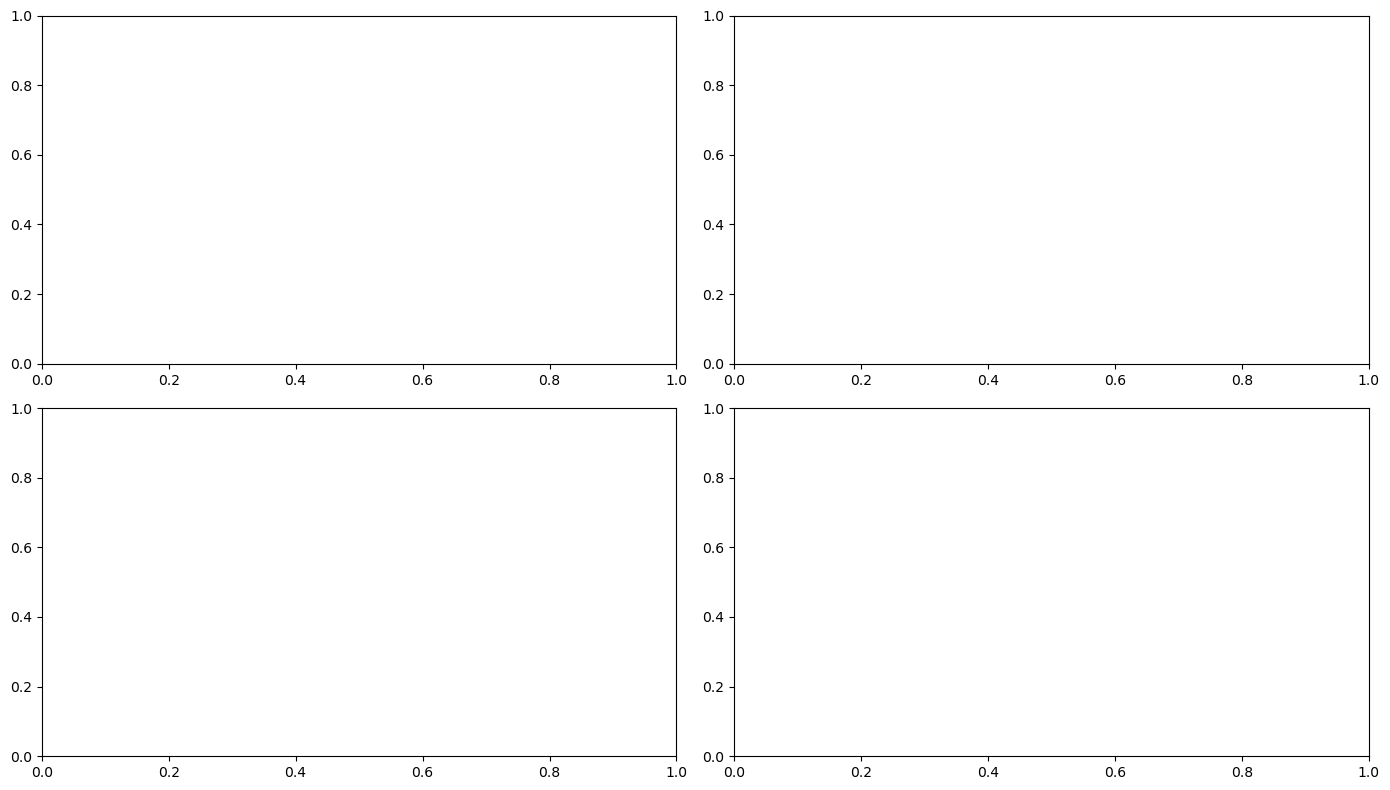

In [20]:
# Boxplot of other numerical variables w.r.t manufacture


# Select numerical columns
num_cols = df.select_dtypes(include="number").columns

# Exclude 'Sales in Thousands' column (Fixing spelling mistake)
num_cols = [col for col in num_cols if "sales in thousands" not in col.lower()]

# Create subplots (Adjust number of rows dynamically)
fig, axes = plt.subplots(2, 2, figsize=(14, 8))  # 2x2 grid

# Flatten axes array for easier indexing
axes = axes.flatten()

# Loop through numerical columns and plot boxplots
for i, col in enumerate(num_cols):
    sns.boxplot(x="manufacturer", y=col, data=df, ax=axes[i])
    axes[i].set_title(f"Boxplot of {col} w.r.t Manufacturer")
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)  # Rotate labels

plt.tight_layout()
plt.show()    



In [21]:
# 23. Divide the data into input and output y=sales in thousand, x=all other variables

x = df.drop(columns=["sales in thousands"])
y = df["sales in thousands"]

In [22]:
# Convert 'latest launch' to datetime
df['latest launch'] = pd.to_datetime(df['latest launch'], format='%d-%b-%y', errors='coerce')


# Specify categorical columns to keep as object
categorical_cols = ['model', 'manufacturer', 'vehicle type']

# Convert all other columns to numeric (except the specified categorical ones)
for col in df.columns:
    if col not in categorical_cols + ['latest launch']:  # Exclude categorical & date columns
        df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to number, handle errors

# Verify new data types
print(df.dtypes)

manufacturer                   object
model                          object
sales in thousands            float64
4-year resale value           float64
vehicle type                   object
price in thousands            float64
engine size                   float64
horsepower                    float64
wheelbase                     float64
width                         float64
length                        float64
curb weight                   float64
fuel capacity                 float64
fuel efficiency               float64
latest launch          datetime64[ns]
dtype: object


In [23]:
# 24. Encode other categorical variables using label encoder


cat_cols = x.select_dtypes(include='object').columns


encoder = LabelEncoder()

for col in cat_cols :
    x[col] = encoder.fit_transform(x[col])    



In [24]:
# 25. Encode categorical variable vehicle type using one-hot encoder

df = pd.get_dummies(df, columns=['vehicle type'],prefix='vehicle', drop_first=True)

In [27]:
# 26.Split the data set into train and test set 70% train set 10% test set

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.7,random_state=42)


In [28]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Select numerical columns and drop missing values
num_cols = df.select_dtypes(include='number').columns
df_cleaned = df.dropna(subset=num_cols)

# Min-Max Scaling (Normalization)
minmax_scaled = MinMaxScaler().fit_transform(df_cleaned[num_cols])

# Standardization (Z-score Scaling)
standard_scaled = StandardScaler().fit_transform(df_cleaned[num_cols])

# Display first few rows
print("Min-Max Scaled Data:\n", pd.DataFrame(minmax_scaled, columns=num_cols).head())
print("\nStandardized Data:\n", pd.DataFrame(standard_scaled, columns=num_cols).head())


Min-Max Scaled Data:
    sales in thousands  4-year resale value  price in thousands  engine size  \
0            0.031102             0.179516            0.167178     0.114286   
1            0.072669             0.235855            0.261228     0.314286   
2            0.015687             0.393733            0.446603     0.357143   
3            0.037537             0.274002            0.201118     0.114286   
4            0.034545             0.294839            0.336877     0.257143   

   horsepower  wheelbase     width    length  curb weight  fuel capacity  \
0    0.215190   0.186551  0.281437  0.306258     0.231056       0.133641   
1    0.430380   0.336226  0.461078  0.579228     0.503727       0.317972   
2    0.392405   0.477223  0.526946  0.628495     0.607143       0.354839   
3    0.240506   0.216920  0.335329  0.380826     0.342547       0.281106   
4    0.367089   0.349241  0.808383  0.567244     0.517391       0.377880   

   fuel efficiency  
0         0.433333  
1   